In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Bag


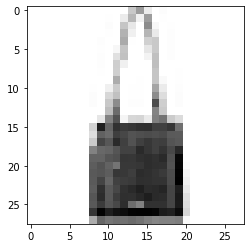

In [9]:
n=200
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, 10)

In [14]:
y_test = to_categorical(y_test, 10)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [16]:
model = Sequential()

In [17]:
model.add(Dense(88, input_dim = 784, activation = 'relu'))
model.add(Dense(821, activation = 'relu'))
model.add(Dense(325, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.03), metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 821)               73069     
_________________________________________________________________
dense_2 (Dense)              (None, 325)               267150    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3260      
Total params: 412,559
Trainable params: 412,559
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, batch_size=150, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0889 - acc: 0.2543
Epoch 2/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0856 - acc: 0.3594
Epoch 3/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0799 - acc: 0.4124
Epoch 4/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0710 - acc: 0.5042
Epoch 5/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0616 - acc: 0.6185
Epoch 6/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0539 - acc: 0.6481
Epoch 7/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0486 - acc: 0.6584
Epoch 8/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0451 - acc: 0.6705
Epoch 9/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0427 - acc: 0.6889
Epoch 10/15
60000/60000 [==============================] - 5s 79us/sample - loss: 

In [21]:
result = model.predict_classes(x_test)

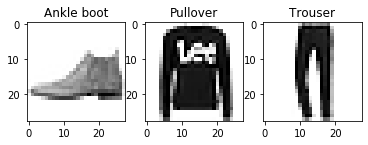

In [22]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    plt.title(class_names[result[i]])